In [110]:
import pygmt
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [111]:
data = gpd.read_file('smoothed_output.shp')

In [112]:
data.head()

id     reg.est   reg.err       rmse                        geometry
0  25019    0.103757  7.600449  18.521743  POINT (2117322.312 556124.507)
1  25019  173.574500  6.981277  18.521743  POINT (2134642.820 556124.507)
2  36121    5.359763  6.823005  27.848575  POINT (1424501.989 556124.507)
3  36121    6.106244  6.722956  27.848575  POINT (1424501.989 546124.507)
4  36121   19.711861  6.581033  27.848575  POINT (1433162.243 561124.507)

In [113]:
data['reg.est'].describe()

count    4960.000000
mean        5.756108
std         9.794106
min         0.000000
25%         0.943172
50%         2.729134
75%         6.517619
max       173.574500
Name: reg.est, dtype: float64

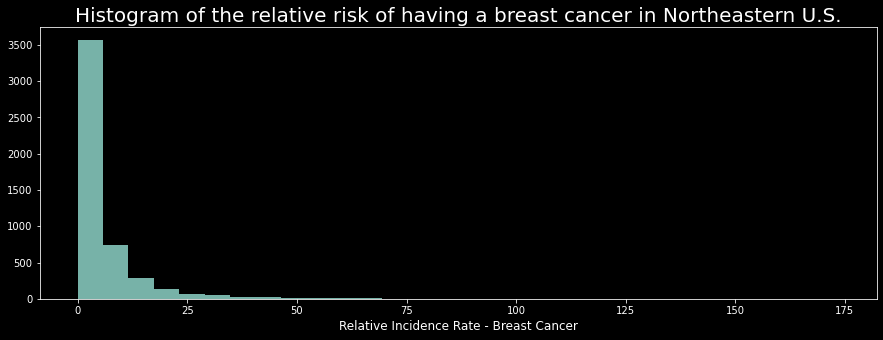

In [114]:
plt.figure(figsize=(15, 5))
plt.hist(data['reg.est'], bins=30, alpha=0.85)
plt.title('Histogram of the relative risk of having a breast cancer in Northeastern U.S.', size=20, pad=5)
plt.xlabel('Relative Incidence Rate - Breast Cancer', size=12)
plt.show()

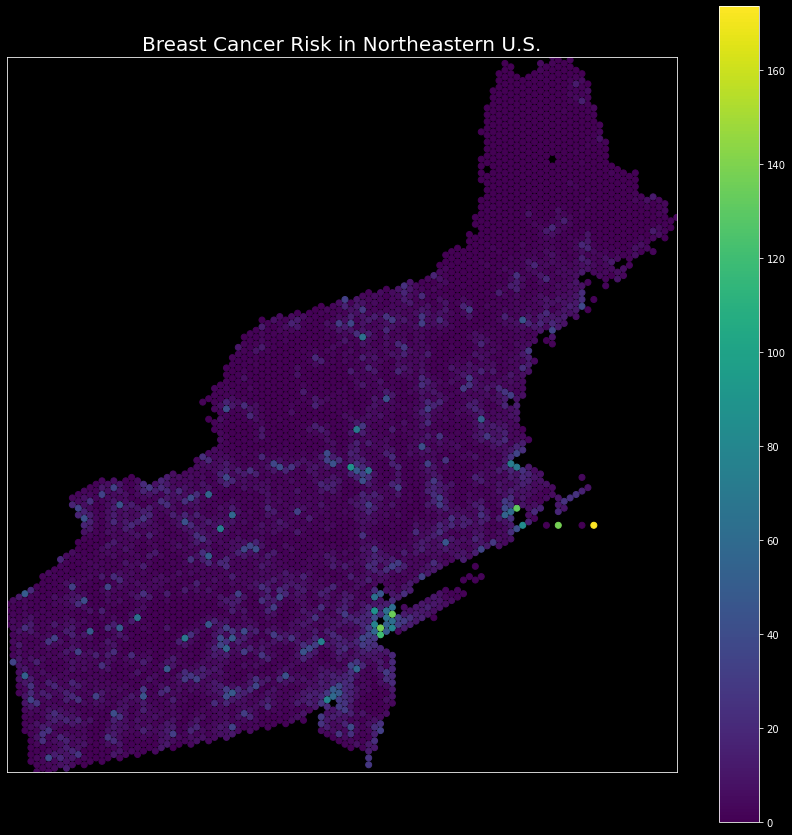

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
data.plot(ax=ax, column='reg.est', legend=True)
ax.set_title('Breast Cancer Risk in Northeastern U.S.', size=20)
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.savefig("initial_map.png", dpi=300, bbox_inches='tight')

In [64]:
# Get data bounds minx, miny, maxx, maxy

bds = data.total_bounds
print(bds)

[1277277.6705919   196124.50679998 2255886.37686832 1241124.50679814]


In [65]:
data.crs

<Derived Projected CRS: PROJCS["Lambert_Conformal_Conic",GEOGCS["NAD83",DA ...>
Name: Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

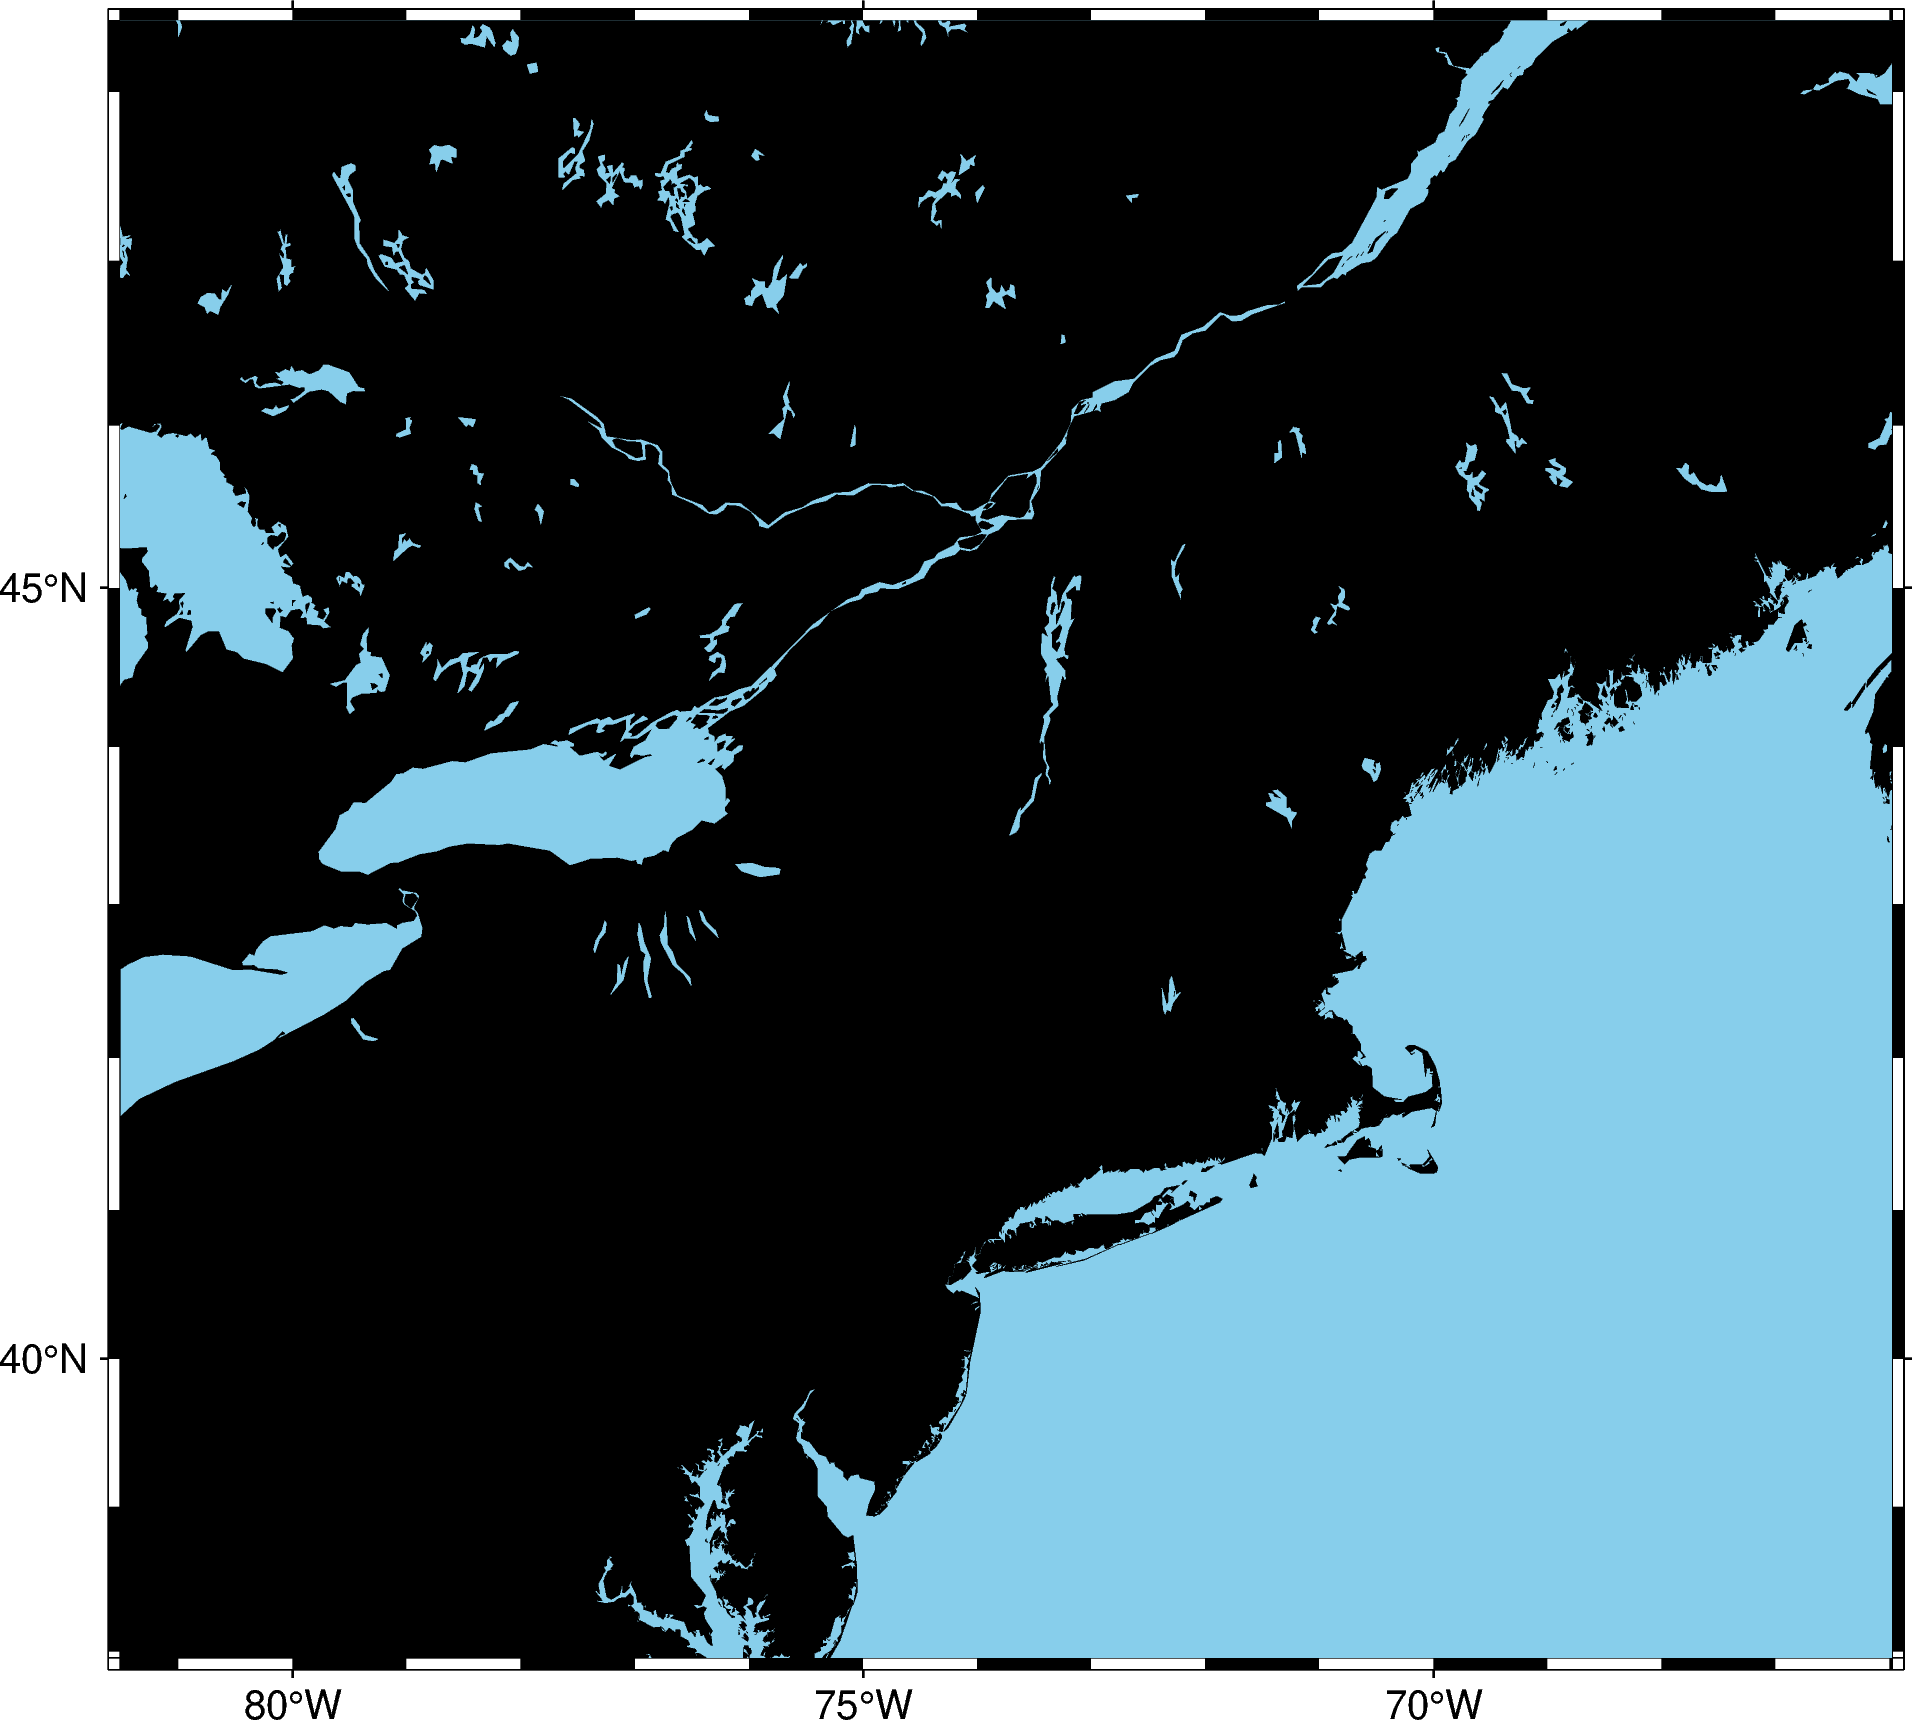

In [67]:
# Canvas

region = [-81.514231279961, -65.98249508664613, 37.956652763089465, 48.41642272162844]
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.show()

In [72]:
# Transform data to the Mercator projection

data2 = data.to_crs(crs='merc')

bds = data2.total_bounds

region = [
    bds[0] - 0.1,
    bds[2] + 0.1,
    bds[1] - 0.1,
    bds[3] + 0.1,
]

print(region)

[-80.61423127996099, -66.88249508664613, 38.856652763089464, 47.516422721628444]


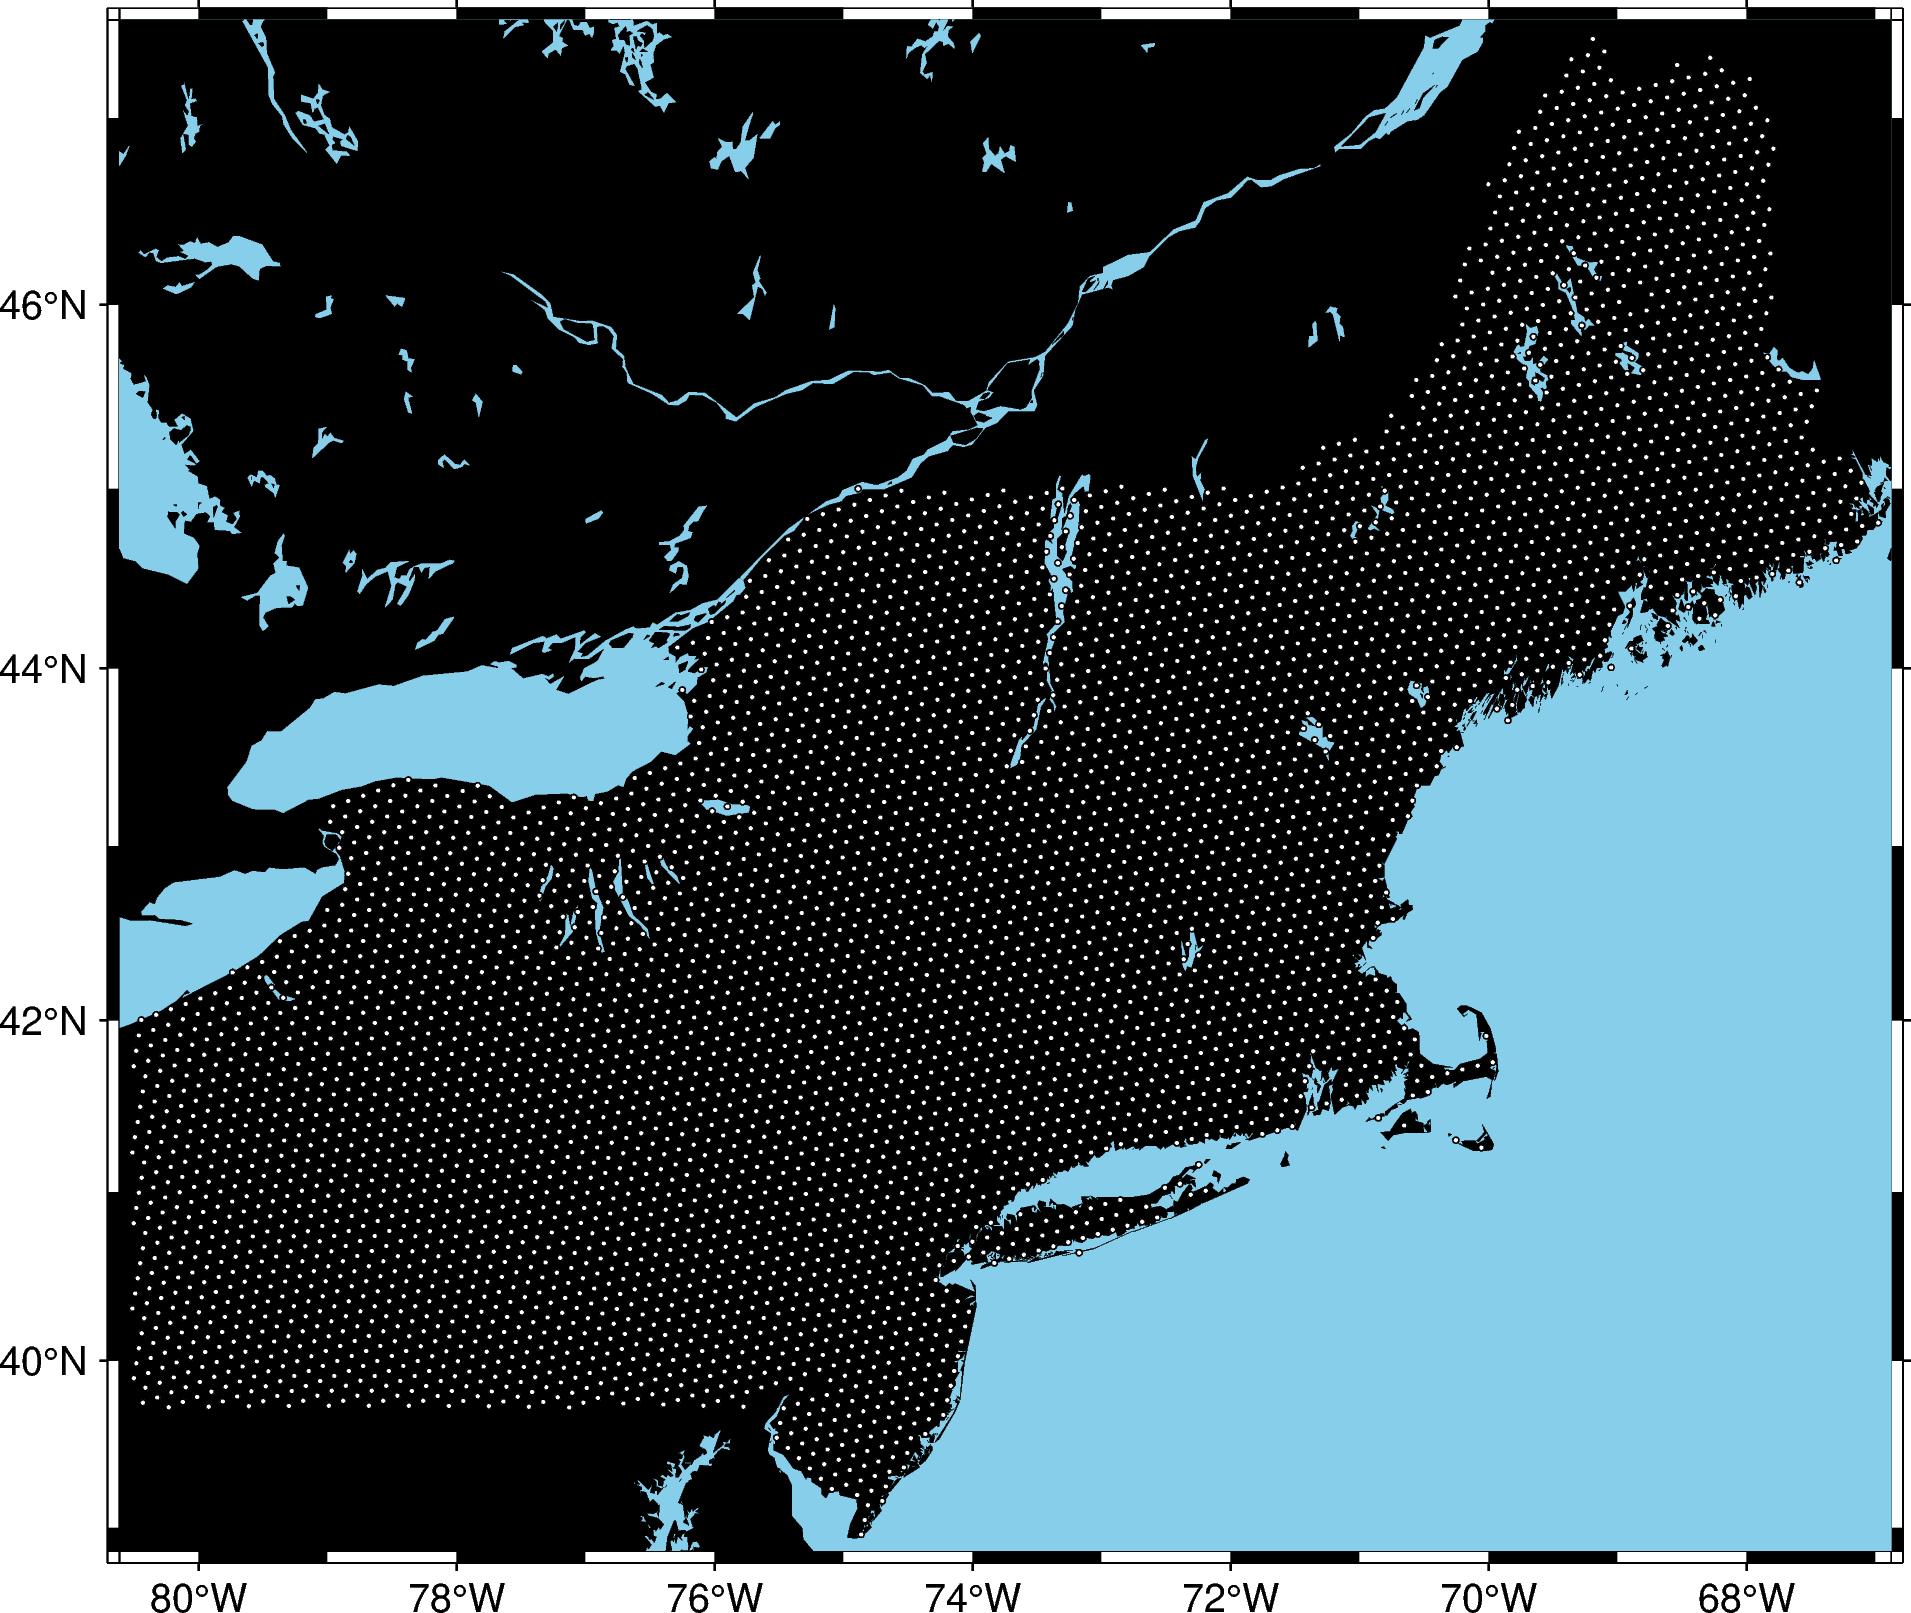

In [73]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
fig.plot(x=data2.geometry.x, y=data2.geometry.y, style="c0.05c", color="white", pen="black")
fig.show()

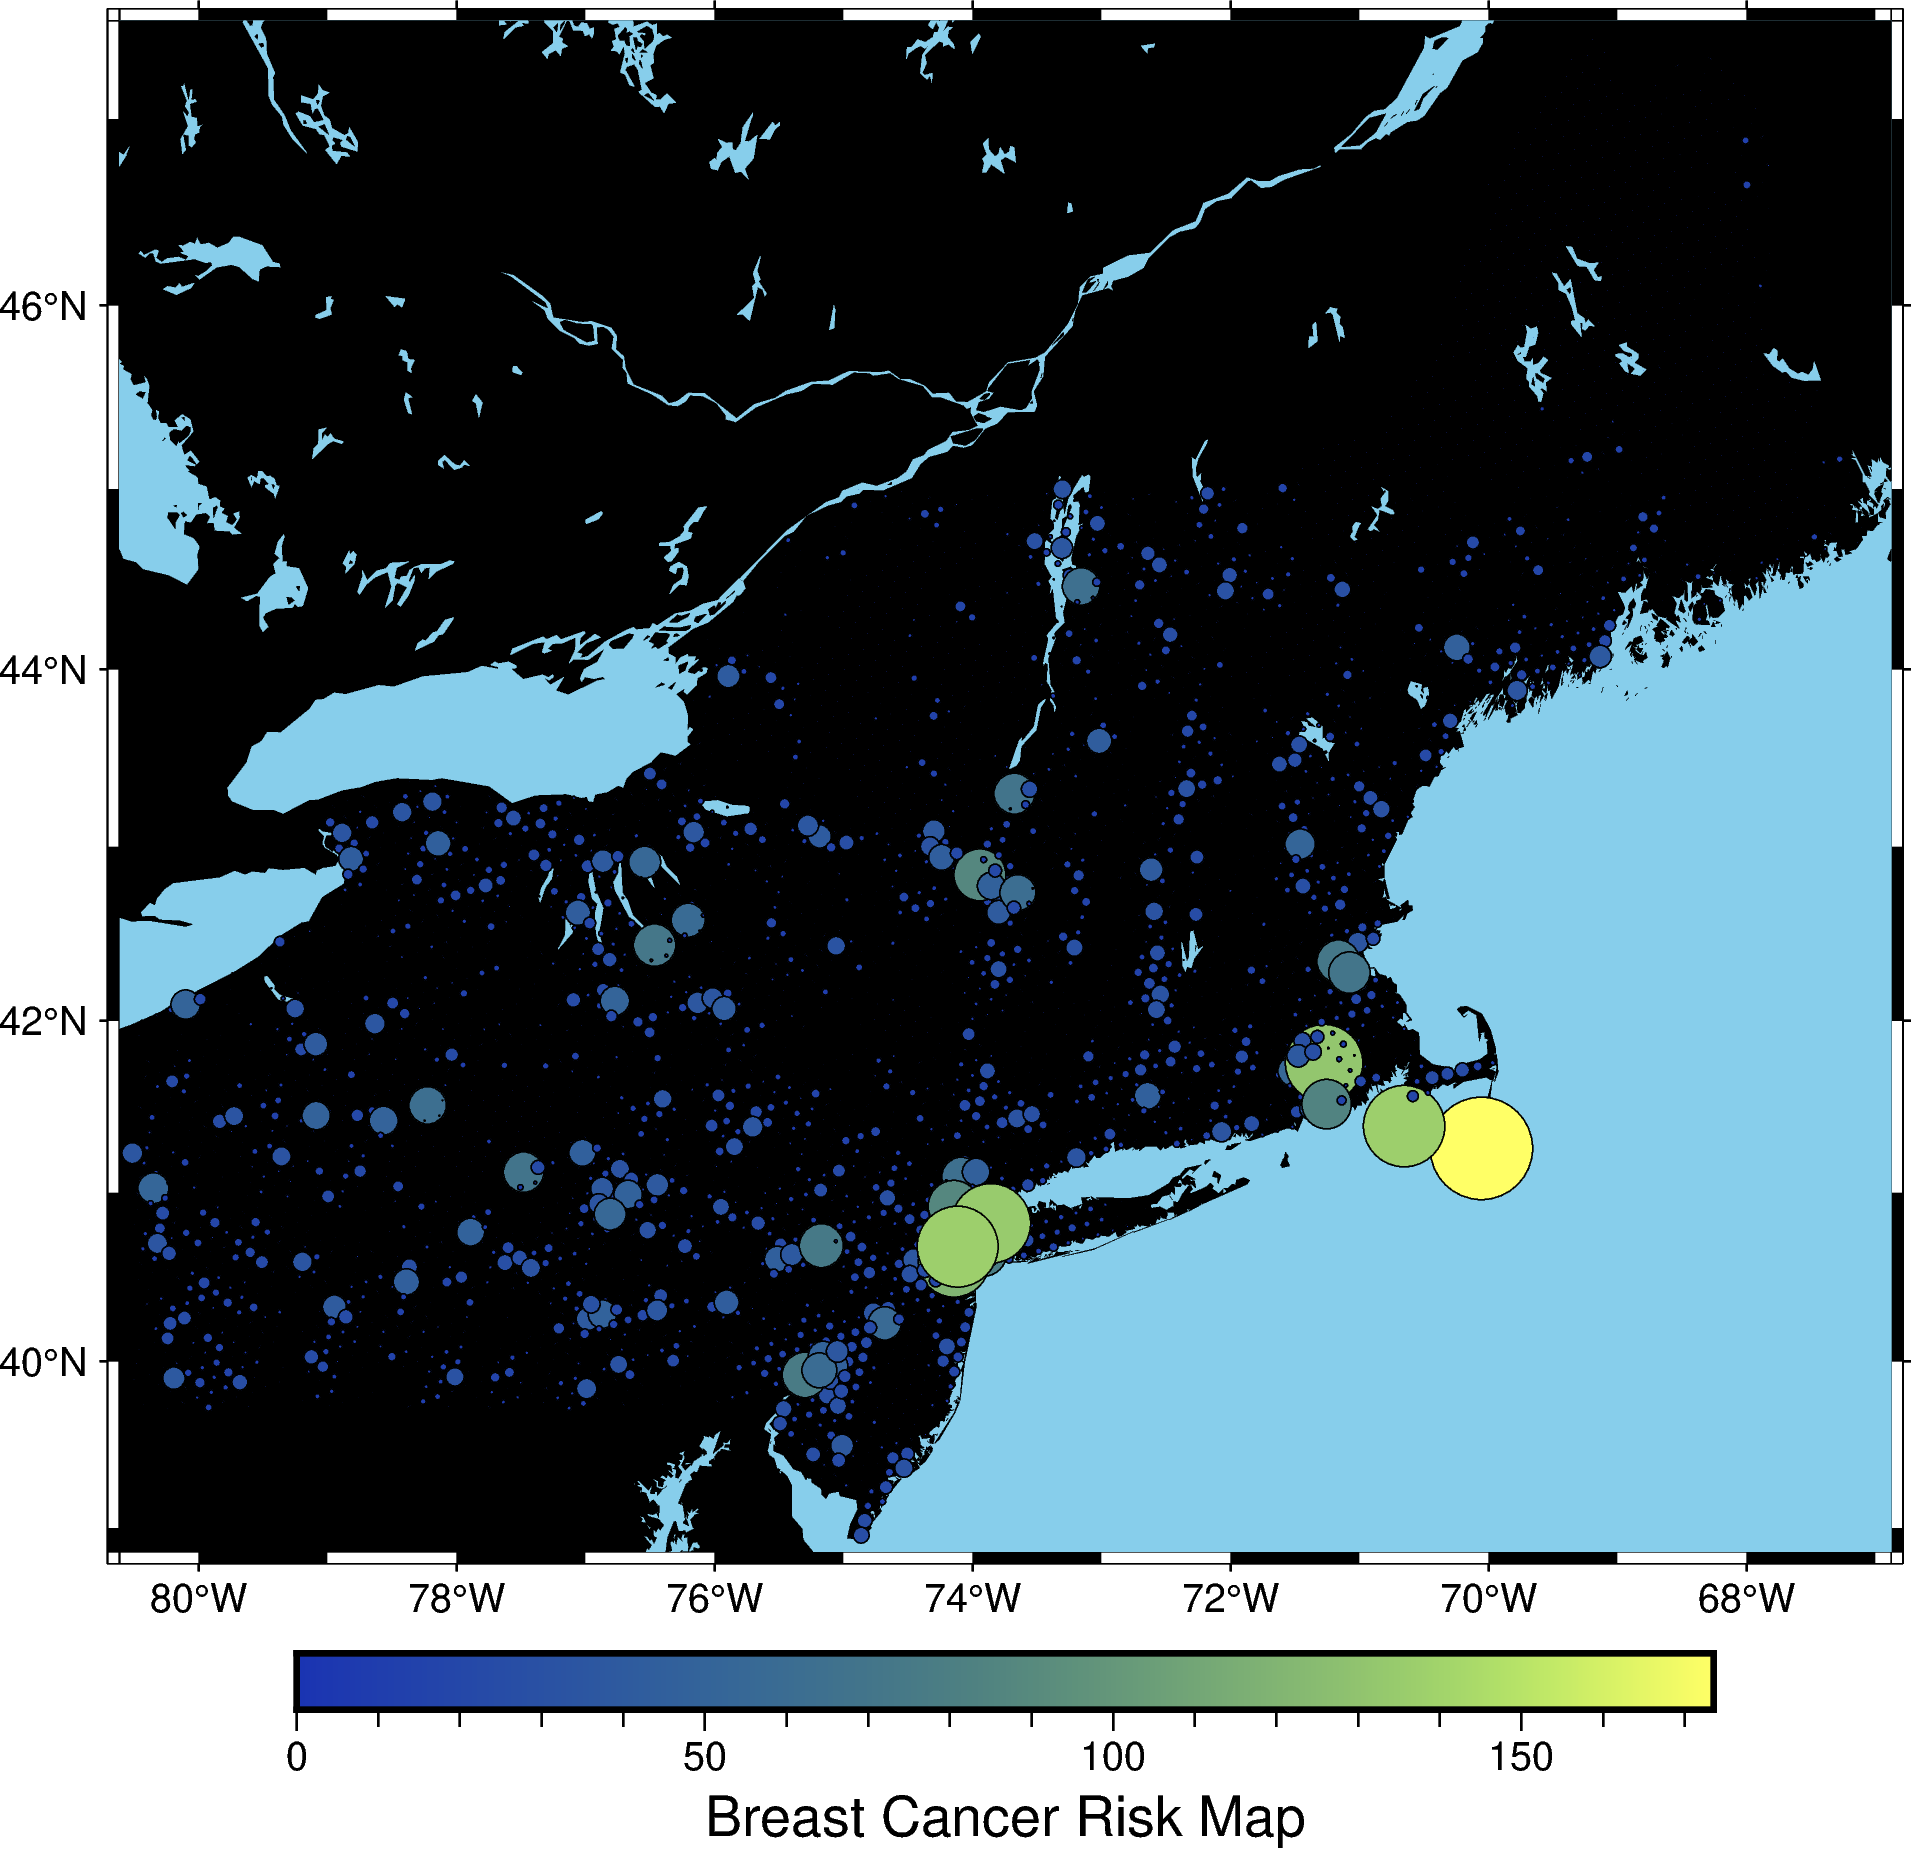

In [76]:
# Set size and color of points

ds = data2['reg.est']

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="imola", series=[ds.min(), ds.max()])
fig.plot(
    x=data2.geometry.x,
    y=data2.geometry.y,
    size=ds / 200,
    style="cc",
    color=ds,
    cmap=True,
    pen="black",
)
fig.colorbar(frame='af+l"Breast Cancer Risk Map"')
fig.show()

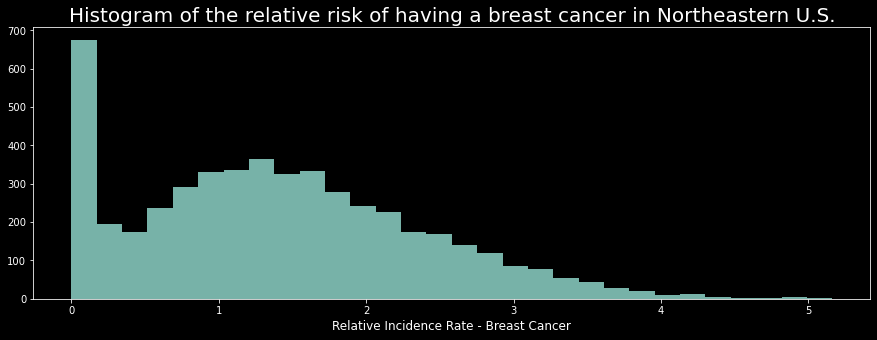

In [78]:
# Transform data

transformed = np.log(ds + 1)

plt.figure(figsize=(15, 5))
plt.hist(transformed, bins=30, alpha=0.85)
plt.title('Histogram of the relative risk of having a breast cancer in Northeastern U.S.', size=20, pad=5)
plt.xlabel('Relative Incidence Rate - Breast Cancer', size=12)
plt.show()

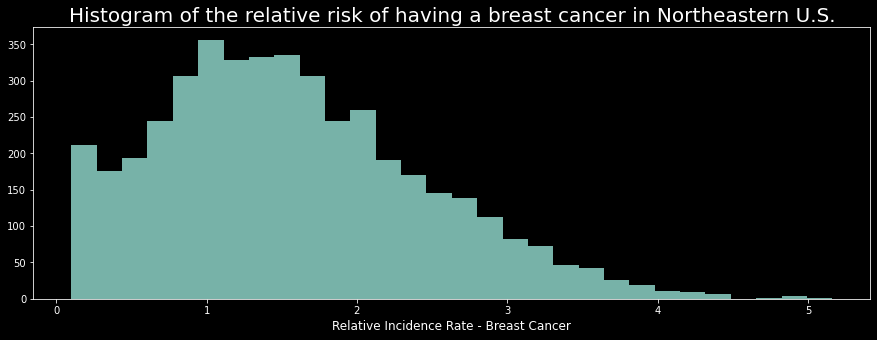

In [81]:
# Remove zeros

transformed = np.log(ds + 1)
transformed[transformed < 0.1] = np.nan

plt.figure(figsize=(15, 5))
plt.hist(transformed, bins=30, alpha=0.85)
plt.title('Histogram of the relative risk of having a breast cancer in Northeastern U.S.', size=20, pad=5)
plt.xlabel('Relative Incidence Rate - Breast Cancer', size=12)
plt.show()

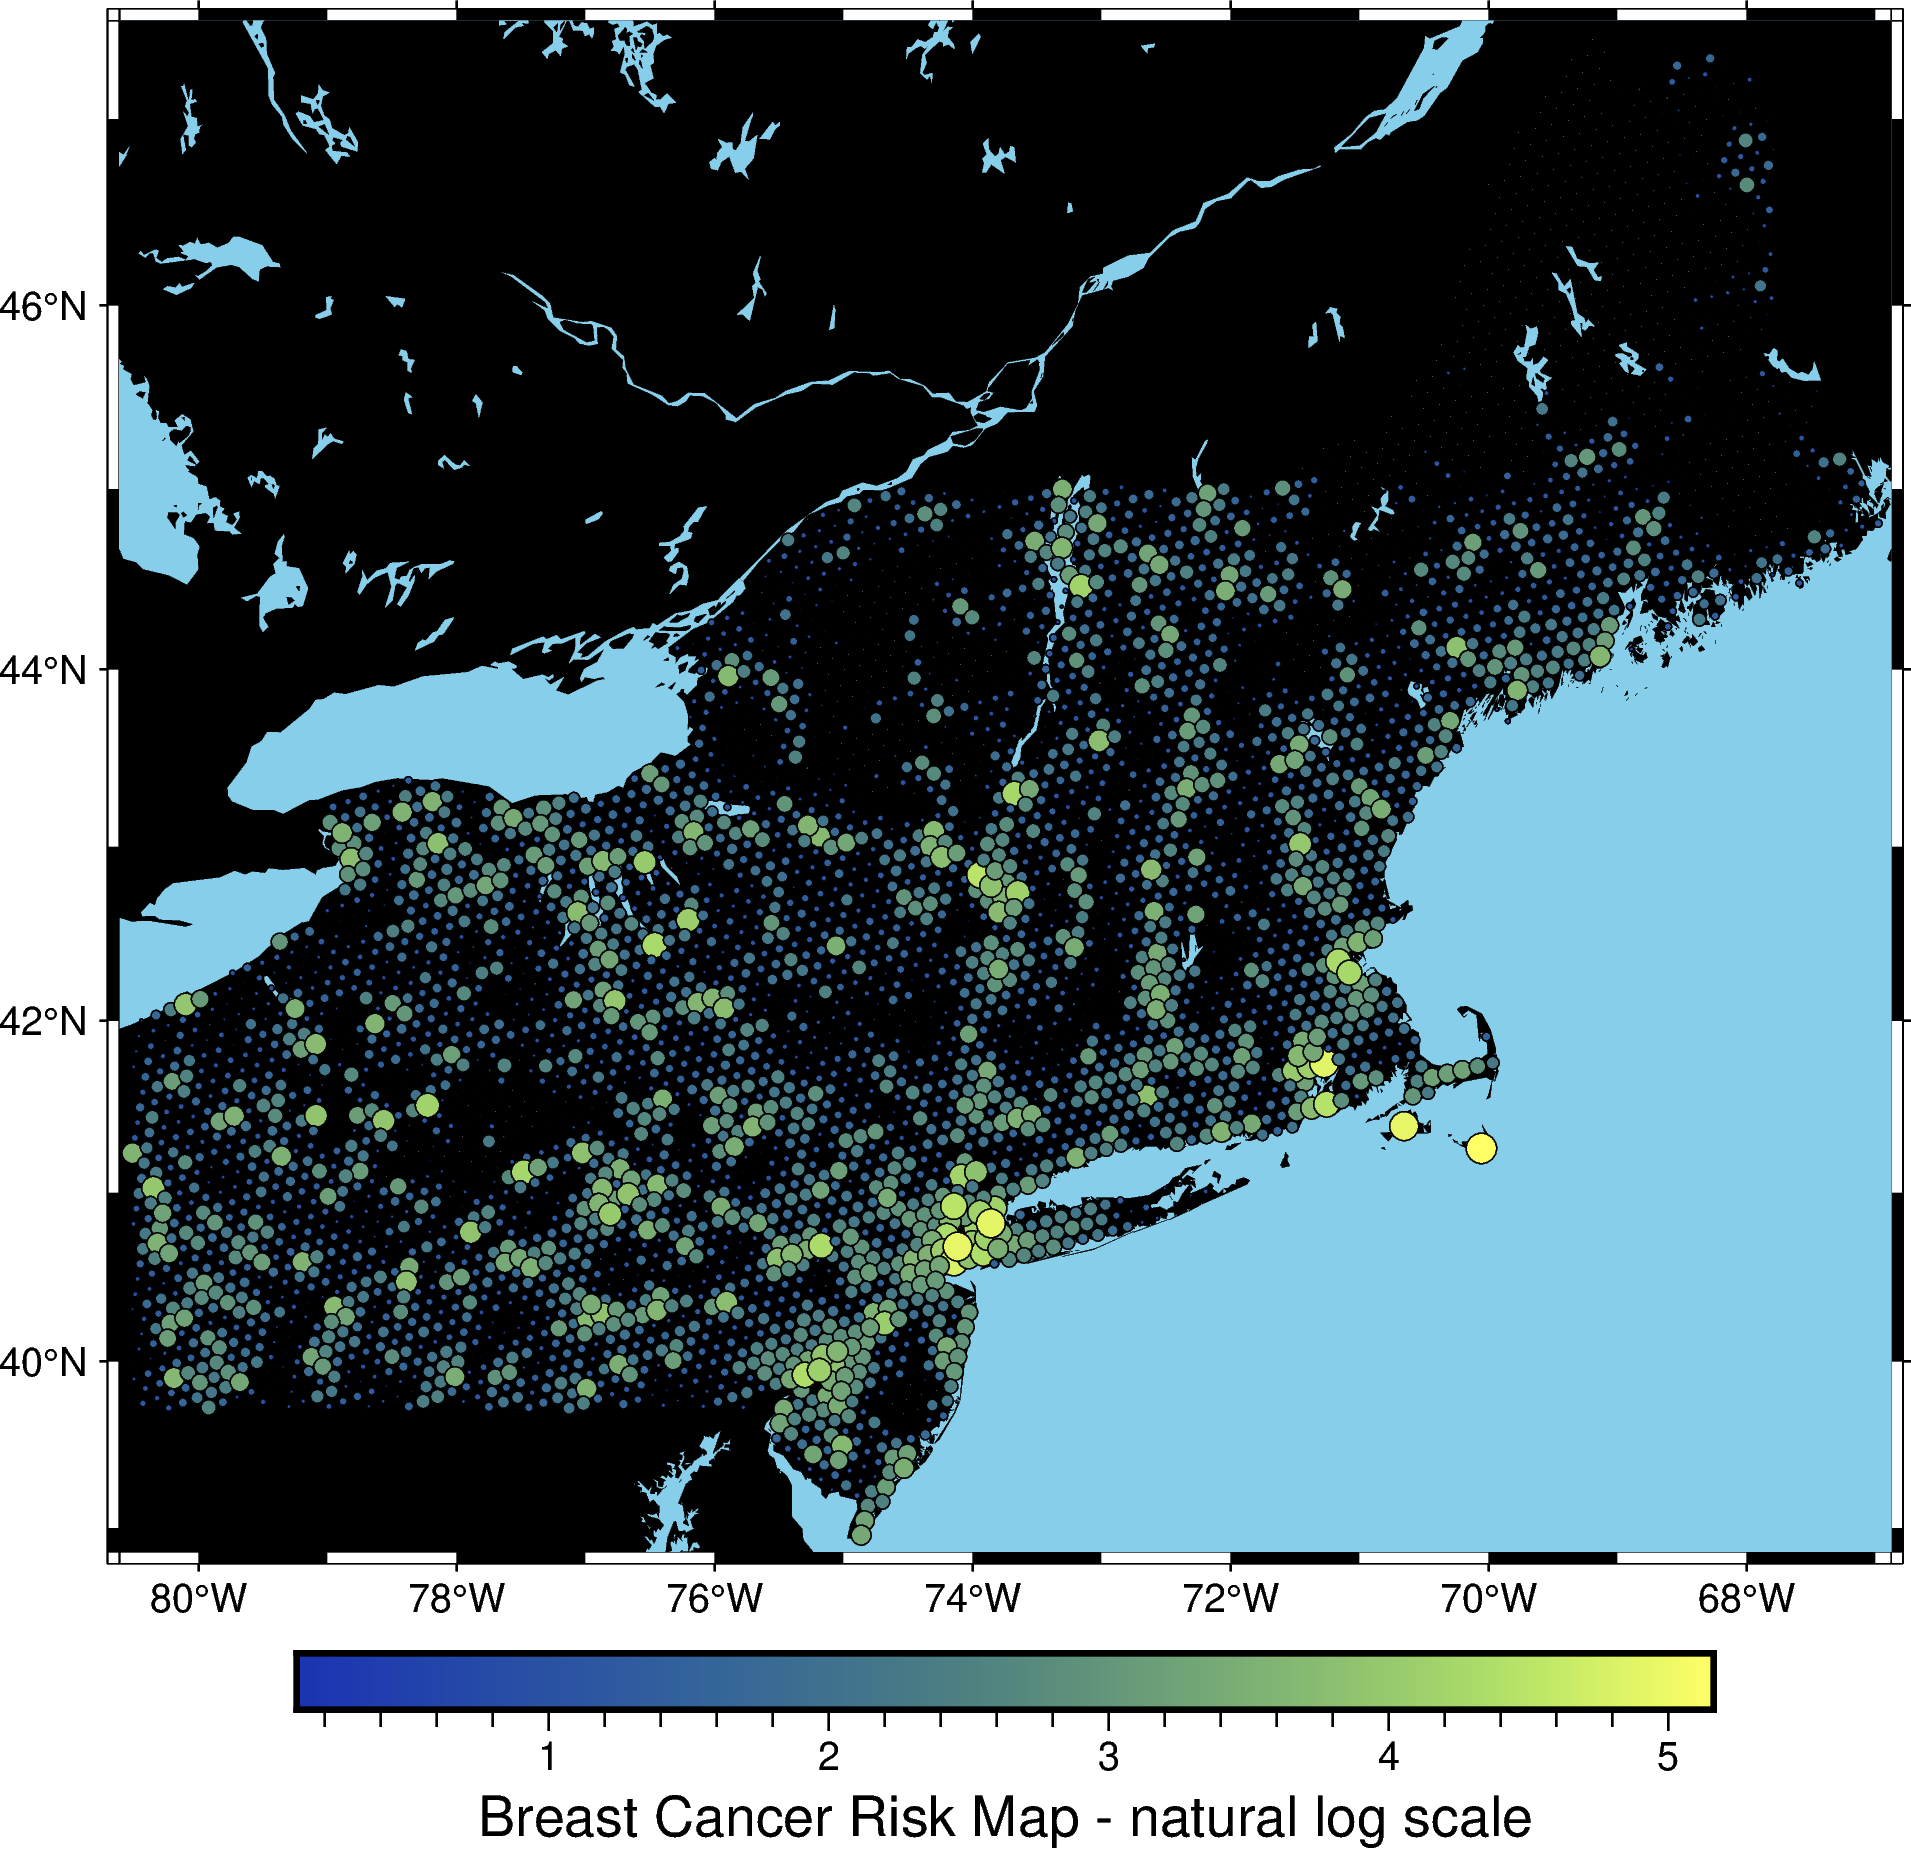

In [116]:
# Draw the new map with log-transformed data

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="black", water="skyblue")
pygmt.makecpt(cmap="imola", series=[transformed.min(), transformed.max()])
fig.plot(
    x=data2.geometry.x,
    y=data2.geometry.y,
    size=transformed / 20,
    style="cc",
    color=transformed,
    cmap=True,
    pen="black",
)
fig.colorbar(frame='af+l"Breast Cancer Risk Map - natural log scale"')
fig.show()

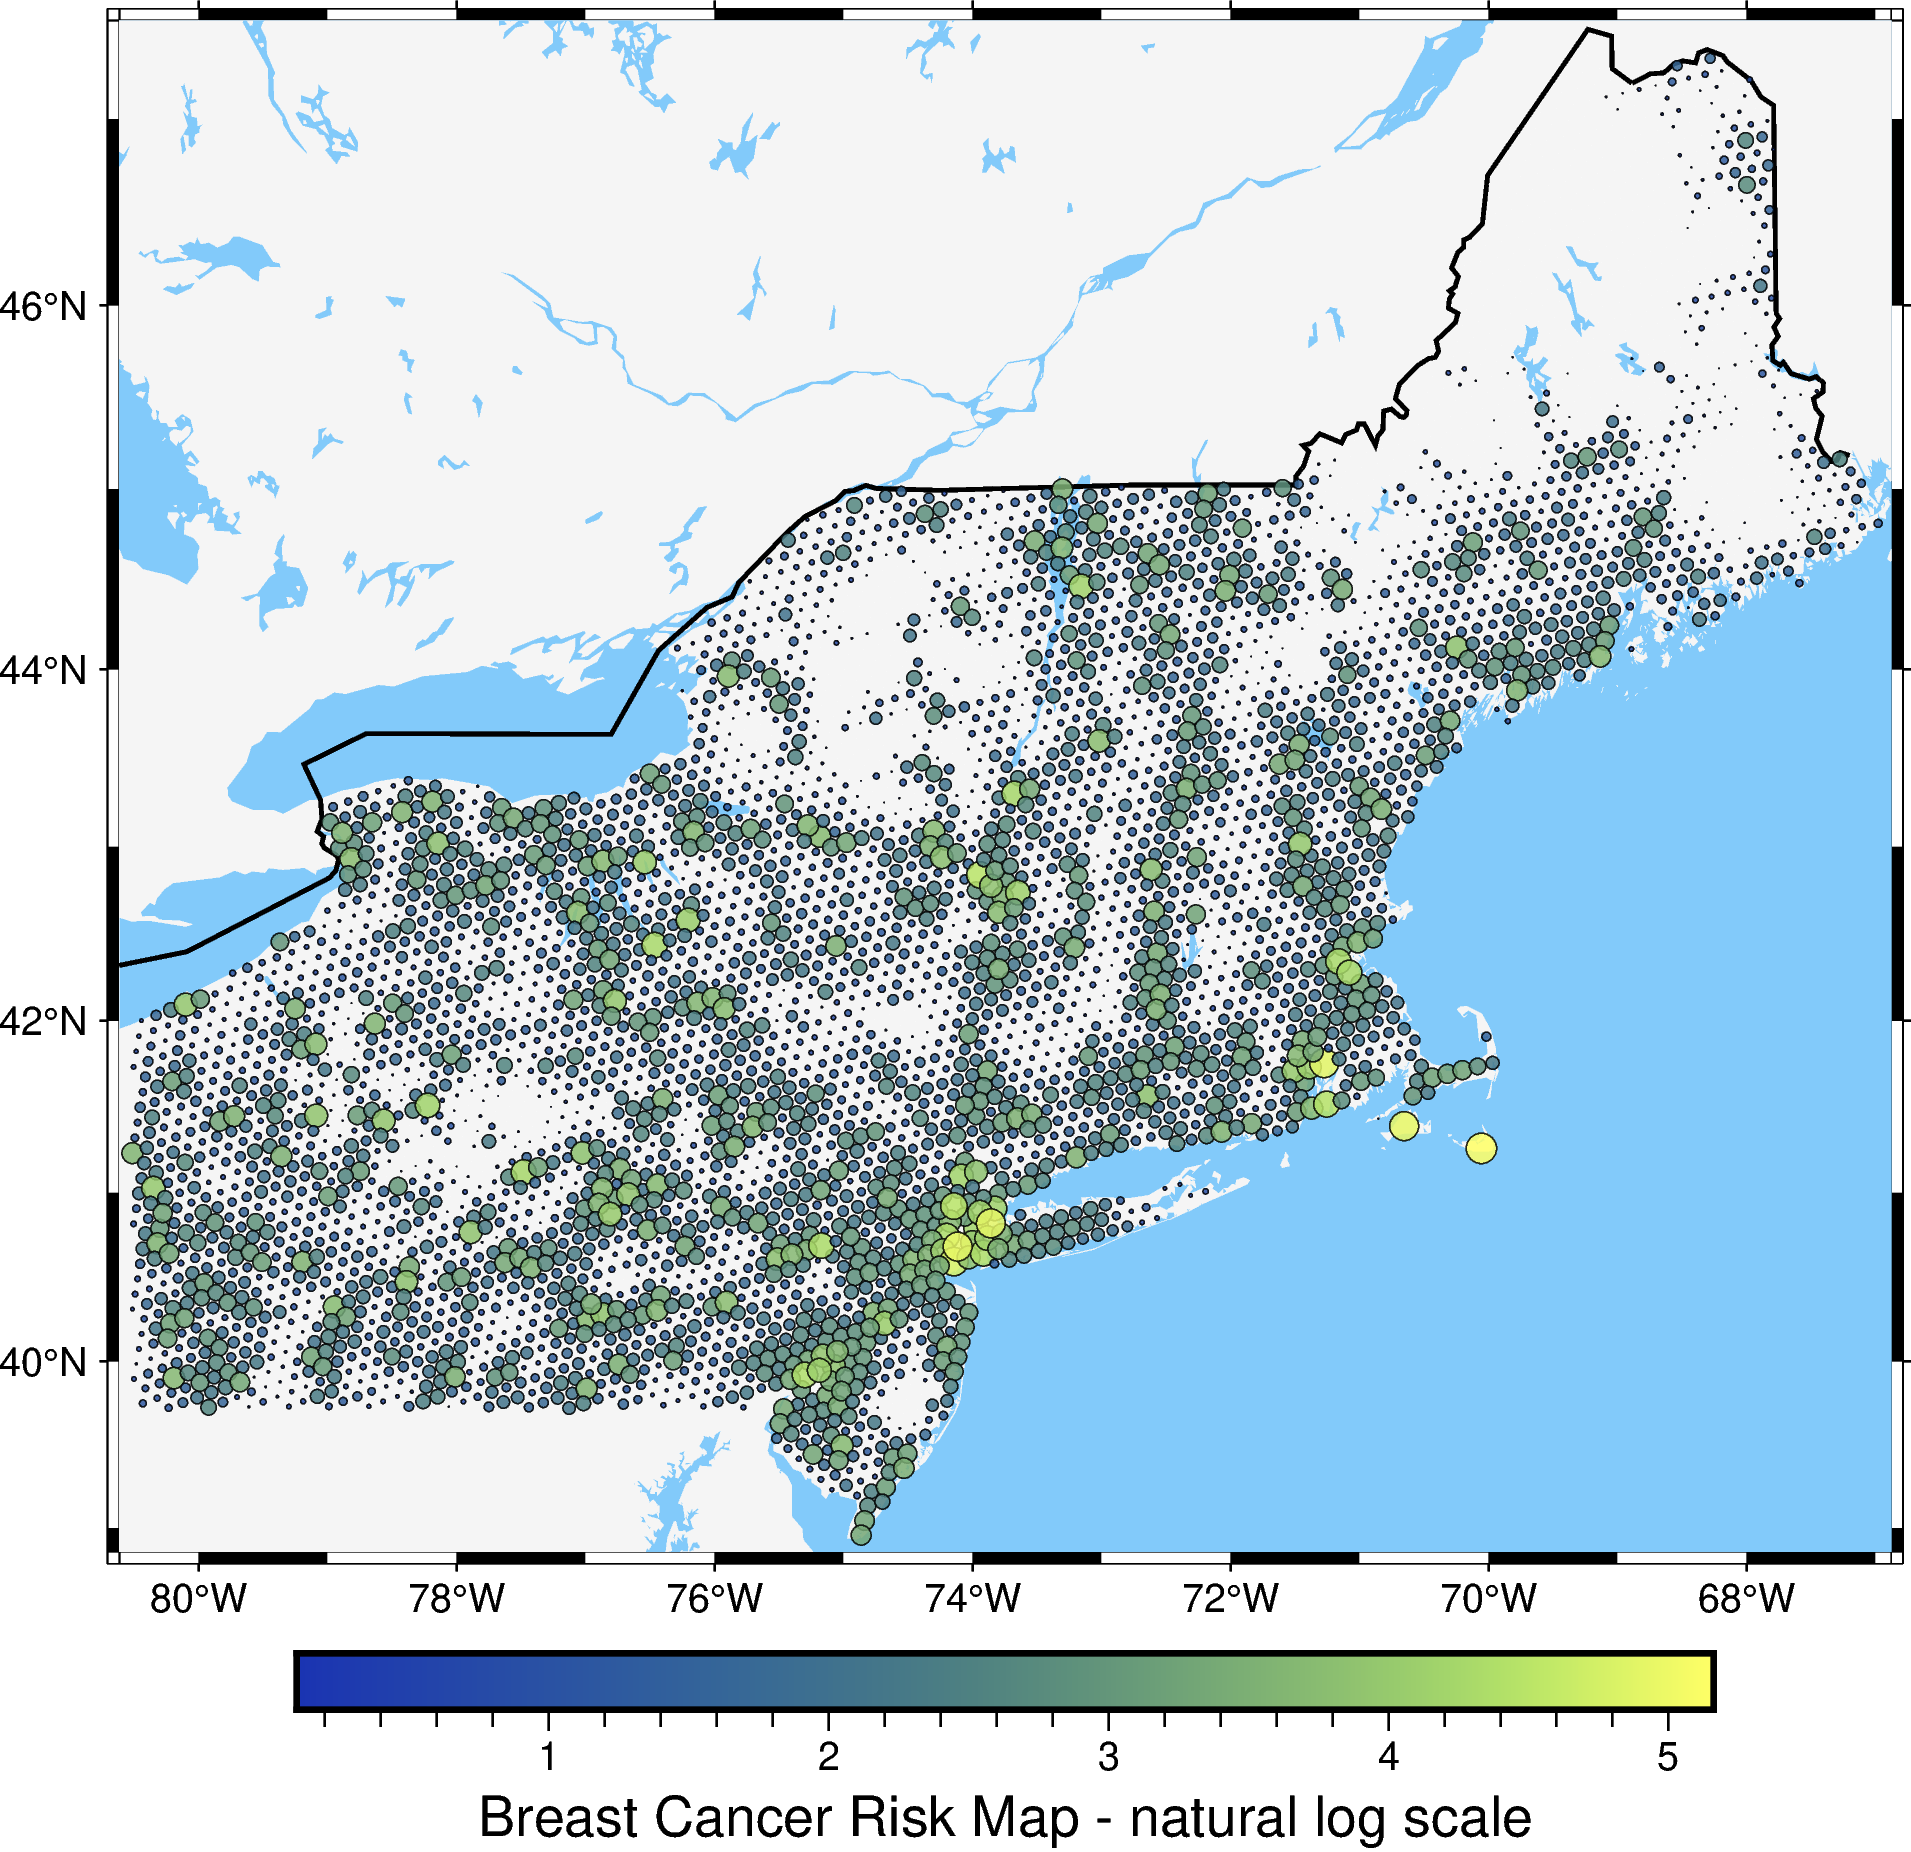

In [117]:
# Work with the style

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="#F5F5F5", water="#82CAFA", borders='1/1p')
pygmt.makecpt(cmap="imola", series=[transformed.min(), transformed.max()])
fig.plot(
    x=data2.geometry.x,
    y=data2.geometry.y,
    size=transformed / 20,
    style="cc",
    color=transformed,
    cmap=True,
    pen="black",
    transparency=15
)
fig.colorbar(frame='af+l"Breast Cancer Risk Map - natural log scale"')
fig.show()

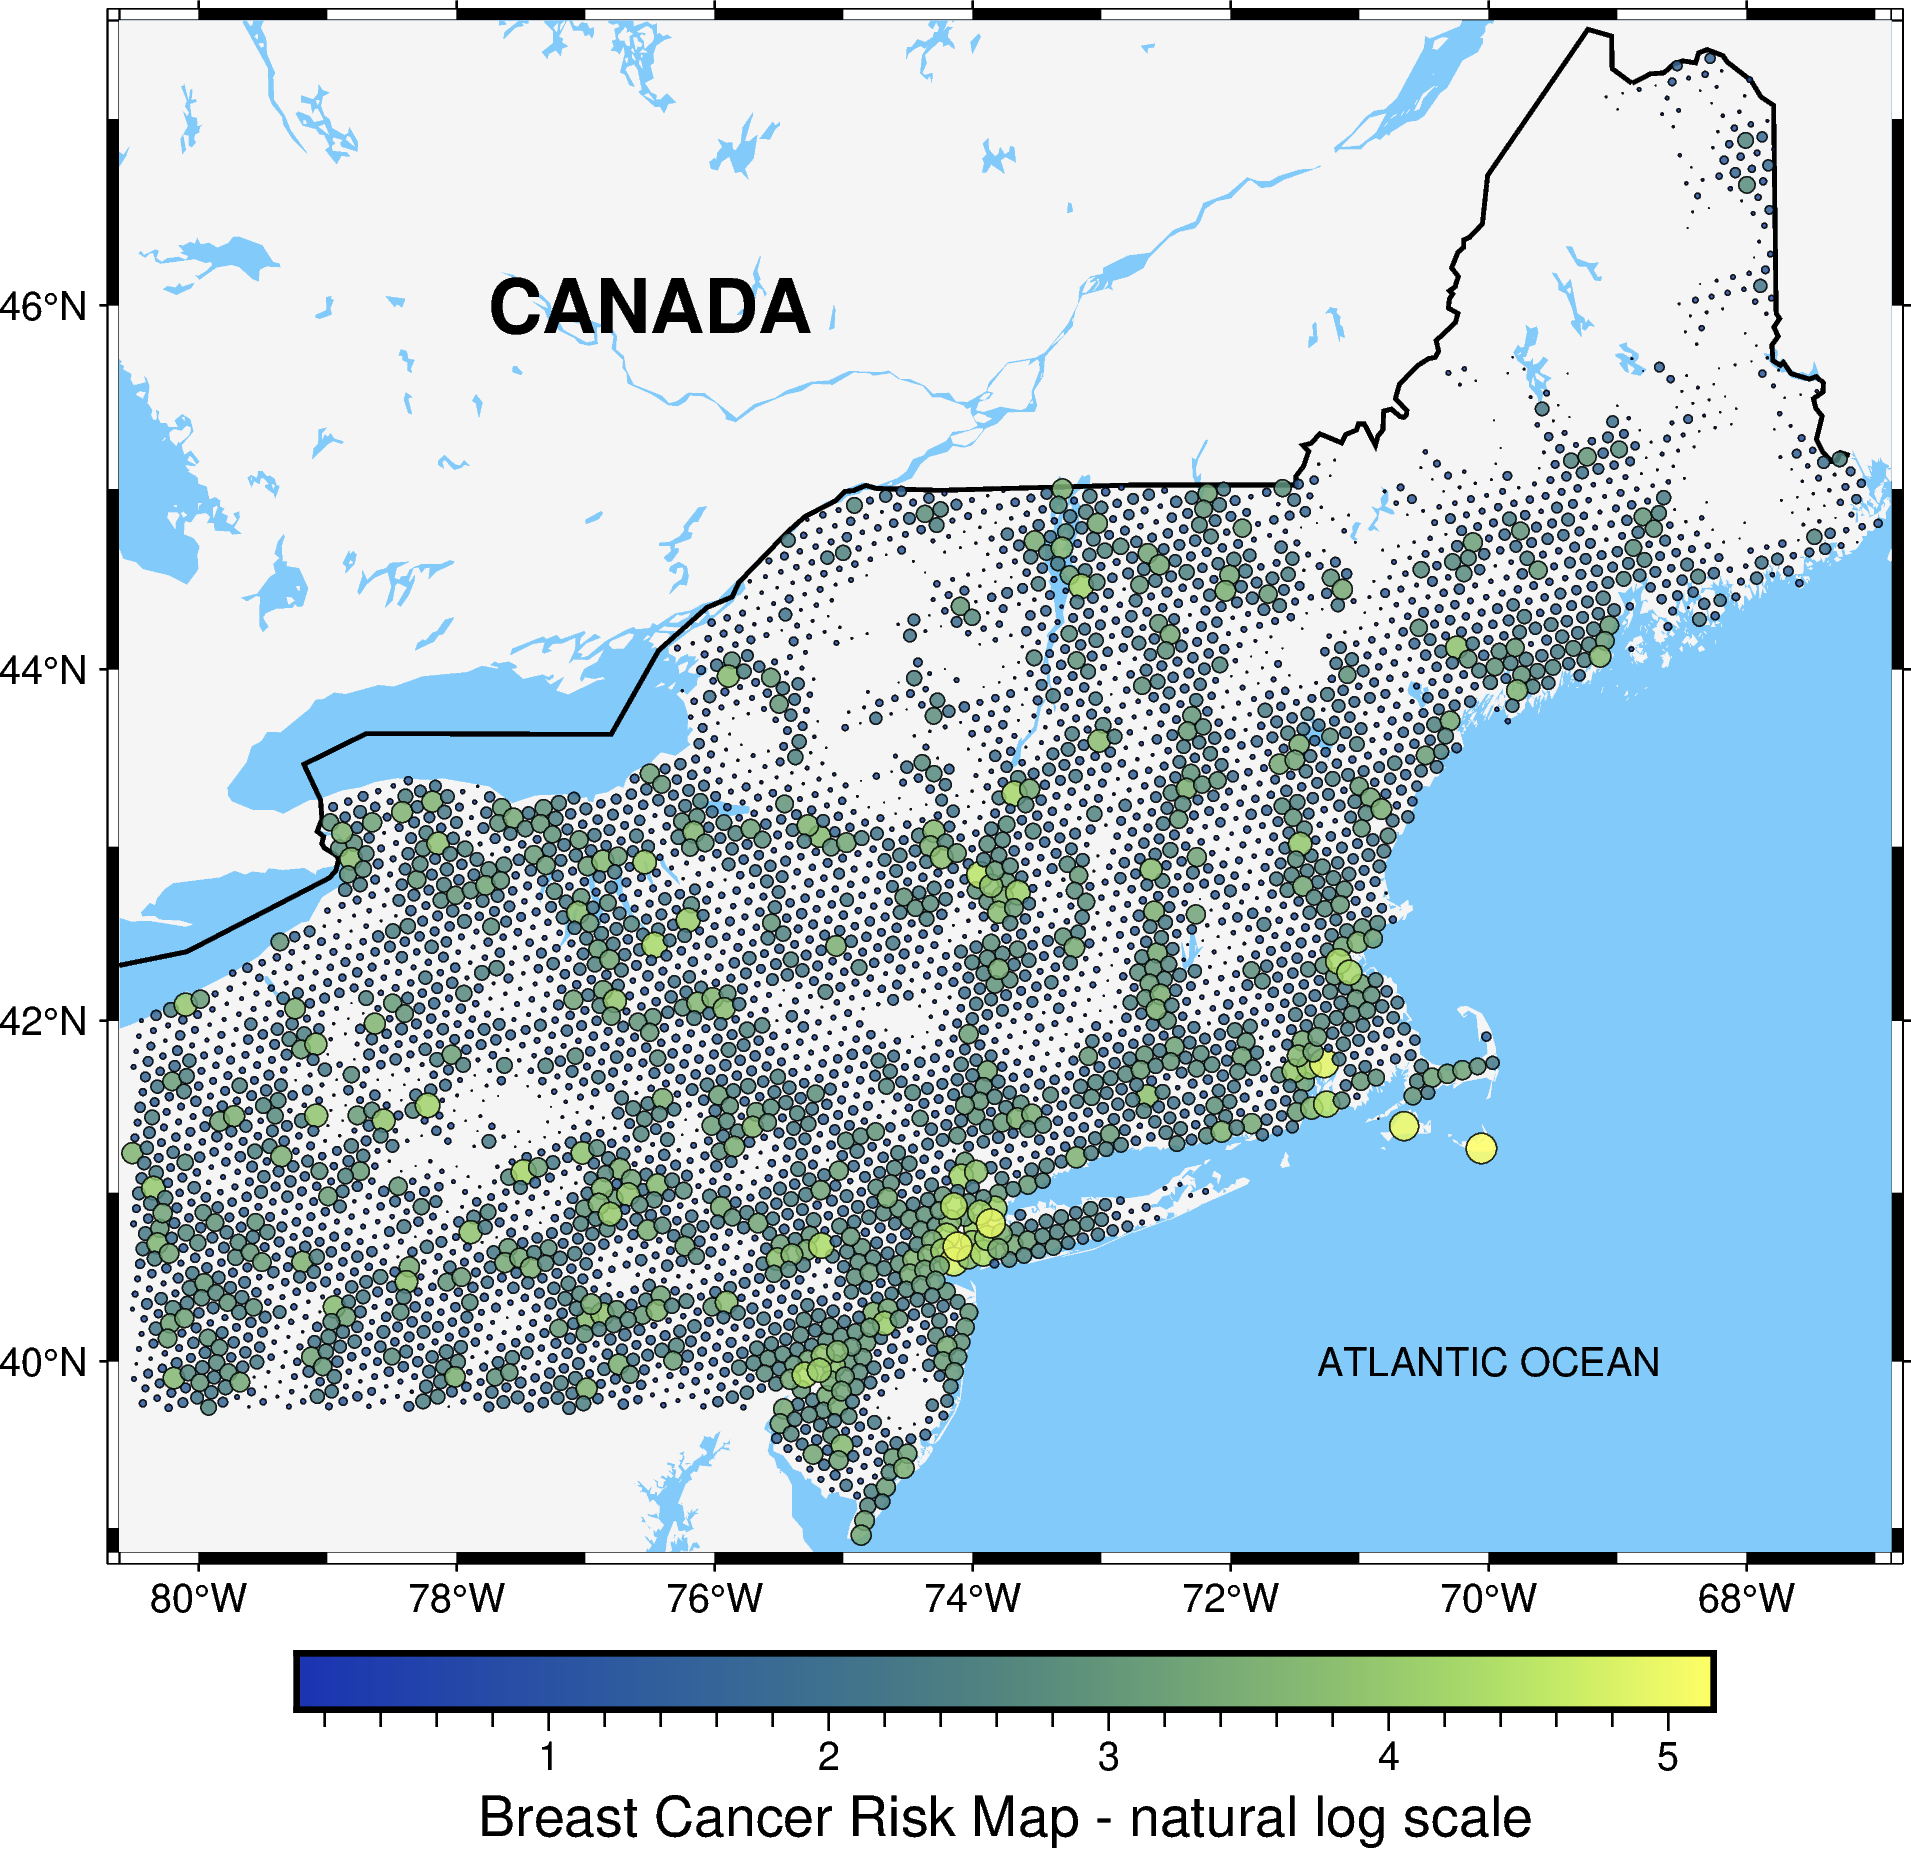

In [118]:
# Add text

fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="#F5F5F5", water="#82CAFA", borders='1/1p')
fig.text(text="CANADA", x=-76.5, y=46, font="18p,Helvetica-Bold")
fig.text(text="ATLANTIC OCEAN", x=-70, y=40)
pygmt.makecpt(cmap="imola", series=[transformed.min(), transformed.max()])
fig.plot(
    x=data2.geometry.x,
    y=data2.geometry.y,
    size=transformed / 20,
    style="cc",
    color=transformed,
    cmap=True,
    pen="black",
    transparency=15
)
fig.colorbar(frame='af+l"Breast Cancer Risk Map - natural log scale"')
fig.show()

In [119]:
fig.savefig('output_fig.png')